In [10]:
import matplotlib.pyplot as plt
import cv2

In [2]:
imagePath = "person.jpg"

In [4]:
img = cv2.imread(imagePath)
img.shape

(360, 540, 3)

In [5]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image.shape

(360, 540)

In [6]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [7]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [8]:
for x, y, w, h in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

In [12]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 539.5, 359.5, -0.5)

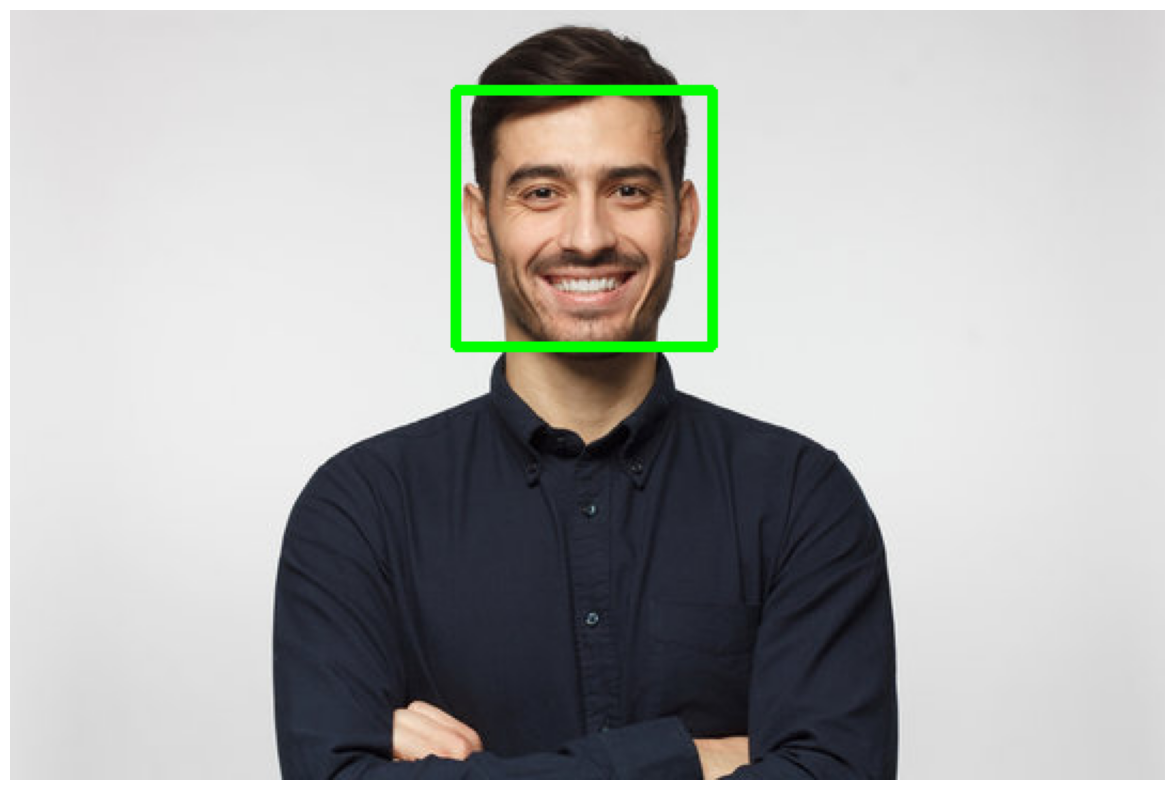

In [13]:
plt.figure(figsize=(20, 10))
plt.imshow(img_rgb)
plt.axis("off")

### Real Time Image 

In [14]:
import cv2

In [15]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [16]:
video_capture = cv2.VideoCapture(0)

In [30]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for x, y, w, h in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return len(faces) 


video_capture = cv2.VideoCapture(0)  
previous_num_faces = -1

In [ ]:
while True:
    result, video_frame = video_capture.read()  # Read frames from the video
    if not result:
        break  # Terminate the loop if the frame is not read successfully

    num_faces = detect_bounding_box(
        video_frame
    )  # Apply the function to the video frame

    # Overlay the number of faces on the video frame
    cv2.putText(
        video_frame,
        f"Faces: {num_faces}",
        (10, 30),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 255, 0),
        2,
        cv2.LINE_AA,
    )

    cv2.imshow("My Face Detection Project", video_frame)  # Display the processed frame

    if num_faces != previous_num_faces:  
        print(f"The number of faces = {num_faces}")
        previous_num_faces = num_faces 

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

: 